Downoad file vgsales.csv <a href="https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv">di sini</a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('vgsales.csv')
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

<h2>Quiz 1 Preparing Data</h2>

Manipulasi data tersebut dengan menggroupkan berdasarkan Genre, kemudian ambil rata2 penjualan untuk setiap Region Kecuali Global_Sales berdasarkan kategori Genre.

In [31]:
sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
sales

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action        0.264726  0.158323  0.048236     0.056508
Adventure     0.082271  0.049868  0.040490     0.013072
Fighting      0.263667  0.119481  0.103007     0.043255
Misc          0.235906  0.124198  0.061967     0.043312
Platform      0.504571  0.227573  0.147596     0.058228
Puzzle        0.212680  0.087251  0.098471     0.021564
Racing        0.287766  0.190865  0.045388     0.061865
Role-Playing  0.219946  0.126384  0.236767     0.040060
Shooter       0.444733  0.239137  0.029221     0.078389
Simulation    0.211430  0.130773  0.073472     0.036355
Sports        0.291283  0.160635  0.057702     0.057532
Strategy      0.100881  0.066579  0.072628     0.016681

Expected Output :

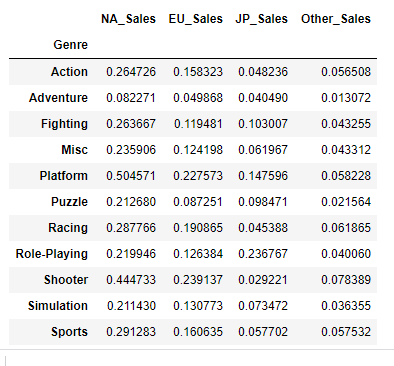

<h2>Perbandingan Kuantitatif Barplot : Grouping Visualisasi Dengan Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menhasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

In [101]:
x = np.arange(0, 12, 3)
action = sales.loc['Action']
adventure = sales.loc['Adventure']
fighting = sales.loc['Fighting']
misc = sales.loc['Misc']
platform = sales.loc['Platform']
puzzle = sales.loc['Puzzle']
racing = sales.loc['Racing']
rpg = sales.loc['Role-Playing']
shooter = sales.loc['Shooter']
simulation = sales.loc['Simulation']
sports = sales.loc['Sports']
strategy = sales.loc['Strategy']
x

array([0, 3, 6, 9])

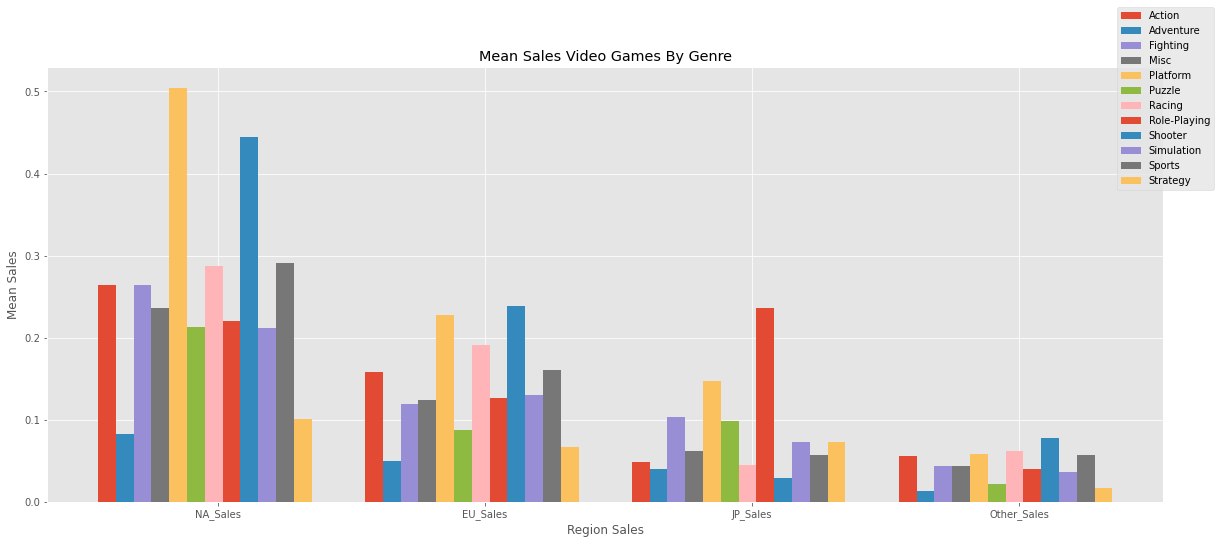

In [145]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 8))

ax.bar(x, action, width= 0.2 , label= 'Action')
ax.bar(x+0.2, adventure, width= 0.2 , label= 'Adventure')
ax.bar(x+0.4, fighting, width= 0.2 , label= 'Fighting')
ax.bar(x+0.6, misc, width= 0.2 , label= 'Misc')
ax.bar(x+0.8, platform, width= 0.2 , label= 'Platform')
ax.bar(x+1, puzzle, width= 0.2 , label= 'Puzzle')
ax.bar(x+1.2, racing, width= 0.2 , label= 'Racing')
ax.bar(x+1.4, rpg, width= 0.2 , label= 'Role-Playing')
ax.bar(x+1.6, shooter, width= 0.2 , label= 'Shooter')
ax.bar(x+1.8, simulation, width= 0.2 , label= 'Simulation')
ax.bar(x+2, sports, width= 0.2 , label= 'Sports')
ax.bar(x+2.2, strategy, width= 0.2 , label= 'Strategy')

ax.set_title('Mean Sales Video Games By Genre')
ax.set_ylabel('Mean Sales')
ax.set_xlabel('Region Sales')
plt.xticks([1.25, 4.25, 7.25, 10.25], sales.columns)
plt.legend(loc='upper right',bbox_to_anchor=(1.05,1.15))
plt.show()

Melalui visualisasi diatas, kita dapat dengan mudah melihat hubungan antara penjualan dan genre pada masing-masing region. Misalnya pada region North America (NA), genre paling laris adalah Platform sedangkan yang paling rendah penjualannya adalah genre Adventure. Contoh lain, pada region JP, tingkat penjualan genre Role-Playing jauh lebih tinggi dibanding genre lain.

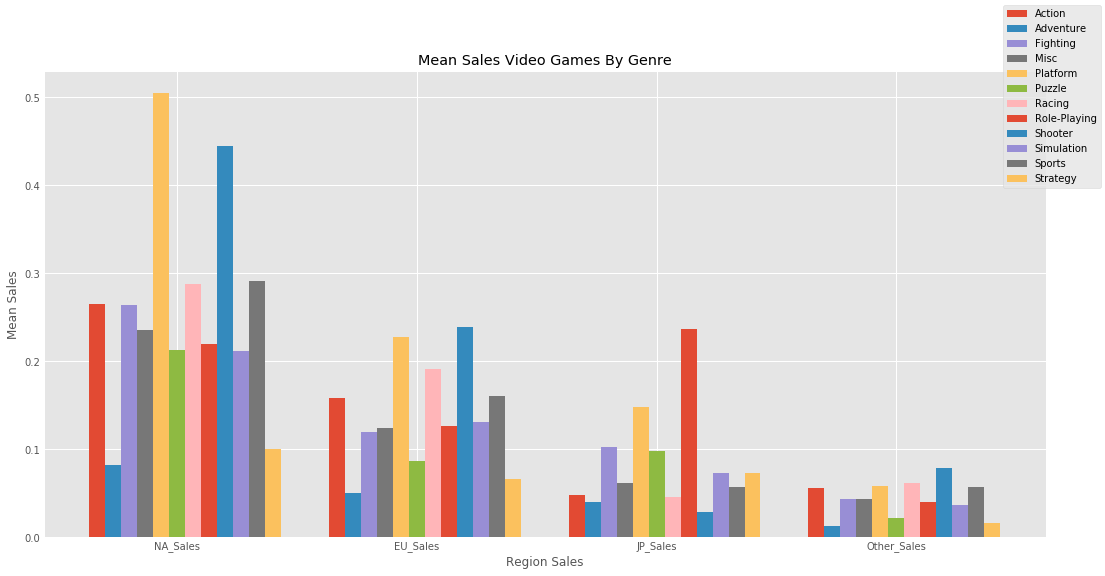

<h2>Perbandingan Kuantitatif Barplot : Stack Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menhasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

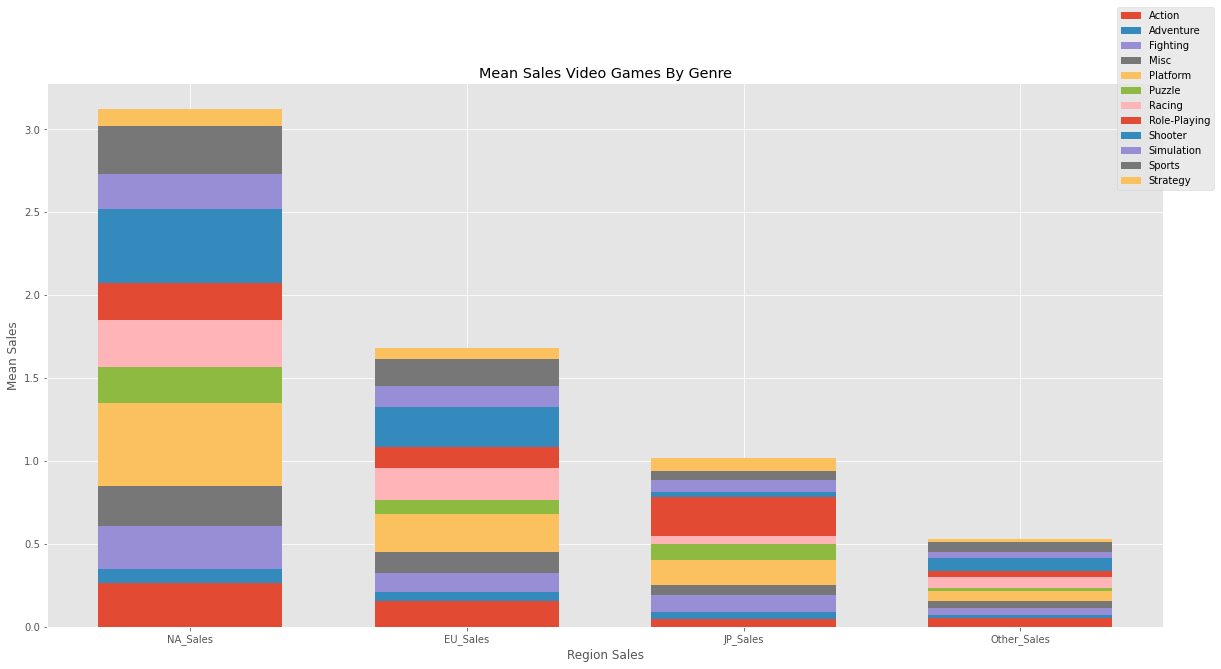

In [175]:
x = np.arange(0, 12, 3)

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 10))

bottom = {
    'adventure' : action,
    'fighting' : action + adventure,
    'misc' : action + adventure + fighting,
    'platform' : action + adventure + fighting + misc,
    'puzzle' : action + adventure + fighting + misc + platform,
    'racing' : action + adventure + fighting + misc + platform + puzzle,
    'rpg' : action + adventure + fighting + misc + platform + puzzle + racing,
    'shooter' : action + adventure + fighting + misc + platform + puzzle + racing + rpg,
    'simulation' : action + adventure + fighting + misc + platform + puzzle + racing + rpg + shooter,
    'sports' : action + adventure + fighting + misc + platform + puzzle + racing + rpg + shooter + simulation,
    'strategy' : action + adventure + fighting + misc + platform + puzzle + racing + rpg + shooter + simulation + sports,
}

ax.bar(x, action , width= 2, label= 'Action')
ax.bar(x, adventure , width= 2, label= 'Adventure', bottom= bottom['adventure'])
ax.bar(x, fighting , width= 2, label= 'Fighting', bottom= bottom['fighting'])
ax.bar(x, misc , width= 2, label= 'Misc', bottom= bottom['misc'])
ax.bar(x, platform , width= 2, label= 'Platform', bottom= bottom['platform'])
ax.bar(x, puzzle , width= 2, label= 'Puzzle', bottom= bottom['puzzle'])
ax.bar(x, racing , width= 2, label= 'Racing', bottom= bottom['racing'])
ax.bar(x, rpg , width= 2, label= 'Role-Playing', bottom= bottom['rpg'])
ax.bar(x, shooter , width= 2, label= 'Shooter', bottom= bottom['shooter'])
ax.bar(x, simulation , width= 2, label= 'Simulation', bottom= bottom['simulation'])
ax.bar(x, sports , width= 2, label= 'Sports', bottom= bottom['sports'])
ax.bar(x, strategy , width= 2, label= 'Strategy', bottom= bottom['strategy'])

ax.set_title('Mean Sales Video Games By Genre')
ax.set_ylabel('Mean Sales')
ax.set_xlabel('Region Sales')
plt.xticks([0, 3, 6, 9], sales.columns)
plt.legend(loc='upper right',bbox_to_anchor=(1.05,1.15))
plt.show()

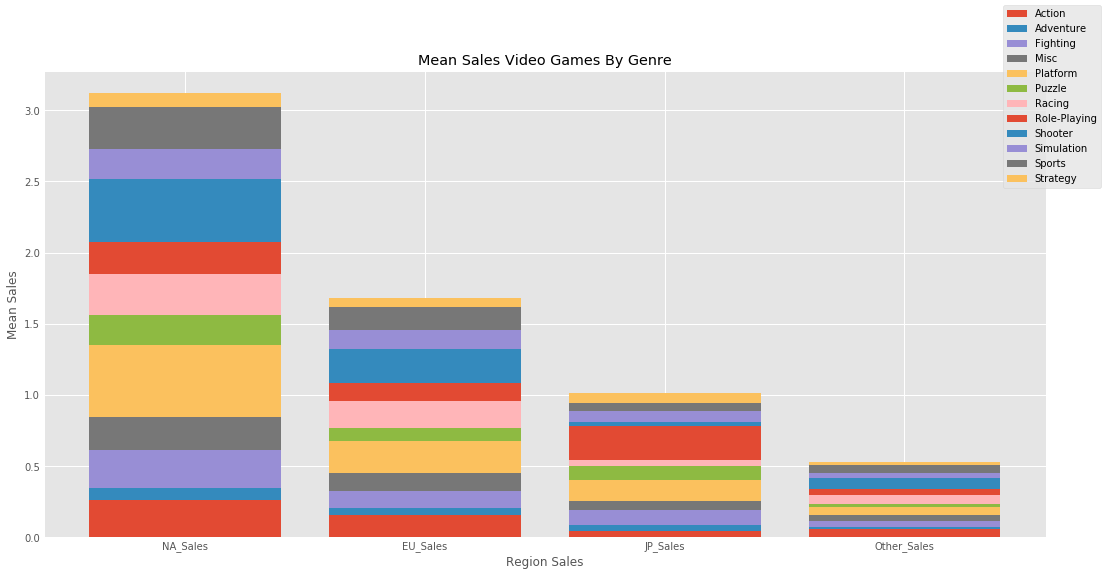

Melalui stack barplot, kita tidak hanya dapat melihat hubungan antara penjualan berdasarkan genre pada region masing-masing, melainkan juga perbandingan penjualan antar regionnya. Terlihat jelas bahwa tingkat penjualan tertinggi ada di region NA, disusul region EU, region JP, dan other region